In [2]:
 #coding=utf-8
from numpy import *

def loadDataSet():
     dataMat = []
     labelMat = []
     fr = open('testSet.txt')
     for line in fr.readlines():
         lineArr = line.strip().split()
         dataMat.append([1.0, float(lineArr[0]), float(lineArr[1])])
         labelMat.append(int(lineArr[2]))
     return dataMat, labelMat
     
 def sigmoid(inX):
     return 1.0/(1+exp(-inX))
     
 def gradAscend(dataMatIn, classLabels):
     dataMatrix = mat(dataMatIn)
     labelMat = mat(classLabels).transpose()
     m,n = shape(dataMatrix)
     alpha = 0.001
     maxCycle = 500
     weight = ones((n,1))
     for k in range(maxCycle):
         h = sigmoid(dataMatrix*weight)
         error = labelMat - h
         weight += alpha * dataMatrix.transpose() * error
         #plotBestFit(weight)
     return weight
 
 def gradAscendWithDraw(dataMatIn, classLabels):
     import matplotlib.pyplot as plt
     fig = plt.figure()
     ax = fig.add_subplot(311,ylabel='x0')
     bx = fig.add_subplot(312,ylabel='x1')
     cx = fig.add_subplot(313,ylabel='x2')
     dataMatrix = mat(dataMatIn)
     labelMat = mat(classLabels).transpose()
     m,n = shape(dataMatrix)
     alpha = 0.001
     maxCycle = 500
     weight = ones((n,1))
     wei1 = []
     wei2 = []
     wei3 = []
     for k in range(maxCycle):
         h = sigmoid(dataMatrix*weight)
         error = labelMat - h
         weight += alpha * dataMatrix.transpose() * error
         wei1.extend(weight[0])
         wei2.extend(weight[1])
         wei3.extend(weight[2])
     ax.plot(range(maxCycle), wei1)
     bx.plot(range(maxCycle), wei2)
     cx.plot(range(maxCycle), wei3)
     plt.xlabel('iter_num')
     plt.show()
     return weight

 def stocGradAscent0(dataMatrix, classLabels):
     m,n = shape(dataMatrix)
     
     alpha = 0.001
     weight = ones(n)
     for i in range(m):
         h = sigmoid(sum(dataMatrix[i]*weight))
         error = classLabels[i] - h
         weight = weight + alpha * error * dataMatrix[i]
     return weight
     
 def stocGradAscentWithDraw0(dataMatrix, classLabels):
     import matplotlib.pyplot as plt
     fig = plt.figure()
     ax = fig.add_subplot(311,ylabel='x0')
     bx = fig.add_subplot(312,ylabel='x1')
     cx = fig.add_subplot(313,ylabel='x2')
     m,n = shape(dataMatrix)
     
     alpha = 0.001
     weight = ones(n)
     wei1 = array([])
     wei2 = array([])
     wei3 = array([])
     numIter = 200
     for j in range(numIter):
         for i in range(m):
             h = sigmoid(sum(dataMatrix[i]*weight))
             error = classLabels[i] - h
             weight = weight + alpha * error * dataMatrix[i]
             wei1 =append(wei1, weight[0])
             wei2 =append(wei2, weight[1])
             wei3 =append(wei3, weight[2])
     ax.plot(array(range(m*numIter)), wei1)
     bx.plot(array(range(m*numIter)), wei2)
     cx.plot(array(range(m*numIter)), wei3)
     plt.xlabel('iter_num')
     plt.show()
     return weight
    
 def stocGradAscent1(dataMatrix, classLabels, numIter=150):
     m,n = shape(dataMatrix)
     
     #alpha = 0.001
     weight = ones(n)
     for j in range(numIter):
         dataIndex = range(m)
         for i in range(m):
             alpha = 4/ (1.0+j+i) +0.01
             randIndex = int(random.uniform(0,len(dataIndex)))
             h = sigmoid(sum(dataMatrix[randIndex]*weight))
             error = classLabels[randIndex] - h
             weight = weight + alpha * error * dataMatrix[randIndex]
             del(dataIndex[randIndex])
     return weight
     
 def stocGradAscentWithDraw1(dataMatrix, classLabels, numIter=150):
     import matplotlib.pyplot as plt
     fig = plt.figure()
     ax = fig.add_subplot(311,ylabel='x0')
     bx = fig.add_subplot(312,ylabel='x1')
     cx = fig.add_subplot(313,ylabel='x2')
     m,n = shape(dataMatrix)
     
     #alpha = 0.001
     weight = ones(n)
     wei1 = array([])
     wei2 = array([])
     wei3 = array([])
     for j in range(numIter):
         dataIndex = range(m)
         for i in range(m):
             alpha = 4/ (1.0+j+i) +0.01
             randIndex = int(random.uniform(0,len(dataIndex)))
             h = sigmoid(sum(dataMatrix[randIndex]*weight))
             error = classLabels[randIndex] - h
             weight = weight + alpha * error * dataMatrix[randIndex]
             del(dataIndex[randIndex])
             wei1 =append(wei1, weight[0])
             wei2 =append(wei2, weight[1])
             wei3 =append(wei3, weight[2])
     ax.plot(array(range(len(wei1))), wei1)
     bx.plot(array(range(len(wei2))), wei2)
     cx.plot(array(range(len(wei2))), wei3)
     plt.xlabel('iter_num')
     plt.show()
     return weight
     
 def plotBestFit(wei):
     import matplotlib.pyplot as plt
     weight = wei
     dataMat,labelMat = loadDataSet()
     dataArr = array(dataMat)
     n = shape(dataArr)[0]
     xcord1 = []
     ycord1 = []
     xcord2 = []
     ycord2 = []
     for i in range(n):
         if int(labelMat[i]) == 1:
             xcord1.append(dataArr[i,1])
             ycord1.append(dataArr[i,2])
         else:
             xcord2.append(dataArr[i,1])
             ycord2.append(dataArr[i,2])
     fig = plt.figure()
     ax = fig.add_subplot(111)
     ax.scatter(xcord1, ycord1, s=30, c='red', marker='s')
     ax.scatter(xcord2, ycord2, s=30, c='green')
     x = arange(-3.0, 3.0, 0.1)
     y = (-weight[0] - weight[1]*x)/weight[2]
     ax.plot(x,y)
     plt.xlabel('X1')
     plt.ylabel('X2')
     plt.show()
     
 def main():
     dataArr,labelMat = loadDataSet()
     #w = gradAscendWithDraw(dataArr,labelMat)
     w = stocGradAscentWithDraw0(array(dataArr),labelMat)
     plotBestFit(w)

 if __name__ == '__main__':
     main()

IOError: [Errno 2] No such file or directory: 'testSet.txt'

0.96
[2]
test set score 0.966666666667
[[  8.48551777e-04   1.75187088e-01   8.23964360e-01]
 [  2.55349832e-02   8.28280027e-01   1.46184990e-01]
 [  9.38770402e-01   6.12219632e-02   7.63524745e-06]
 [  1.95595855e-04   3.92858391e-01   6.06946013e-01]
 [  8.59320284e-01   1.40622105e-01   5.76113536e-05]
 [  2.66875251e-04   1.55252833e-01   8.44480292e-01]
 [  8.95117125e-01   1.04841756e-01   4.11191018e-05]
 [  2.35243207e-02   6.58831216e-01   3.17644464e-01]
 [  1.08833116e-02   6.98823212e-01   2.90293477e-01]
 [  7.00413669e-02   7.49572383e-01   1.80386250e-01]
 [  5.20656908e-04   4.20959554e-01   5.78519789e-01]
 [  4.26710447e-02   6.21482821e-01   3.35846134e-01]
 [  1.09432076e-02   6.34645730e-01   3.54411062e-01]
 [  1.40712441e-02   6.19260220e-01   3.66668536e-01]
 [  1.06714217e-02   5.32156800e-01   4.57171779e-01]
 [  8.01498547e-01   1.98425468e-01   7.59849427e-05]
 [  1.58451196e-02   5.00866210e-01   4.83288670e-01]
 [  1.09602570e-02   5.46972426e-01   4.420

D:\Program\Anaconda2\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


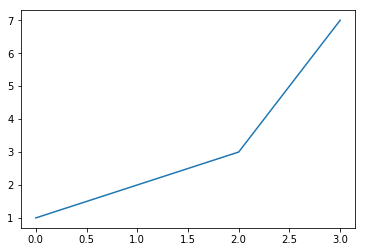

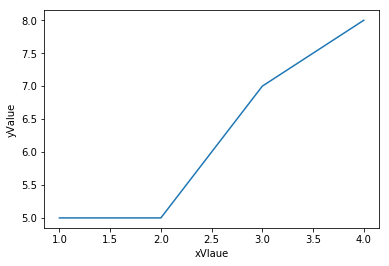

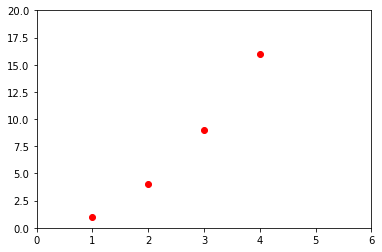

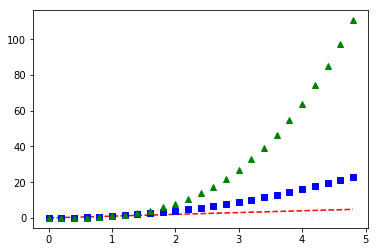

In [2]:
 #coding=utf-8
'''
#iris datasets
150,4,setosa,versicolor,virginica
5.1,3.5,1.4,0.2,0
7.0,3.2,4.7,1.4,1
6.3,3.3,6.0,2.5,2
'''
from numpy import *   
from sklearn.datasets import load_iris     # import datasets  
  
# load the dataset: iris  
iris = load_iris()   
samples = iris.data  
samples.reshape(-1,1)
#print samples   
target = iris.target   
# import the LogisticRegression  
from sklearn.linear_model import LogisticRegression   
  
classifier = LogisticRegression()  # 使用类，参数全是默认的  
classifier.fit(samples, target)  # 训练数据来学习，不需要返回值  
  
y = classifier.predict([5, 3, 5, 2.5])  # 测试数据，分类返回标记  
score = classifier.score(samples, target)
print score
print y
iris

#iris.data
#iris.data.shape
#iris.DESCR
#iris.target
#iris.target_namee
#iris.feature_names
#拆分数据集为训练集和测试集
from sklearn import cross_validation
x_train, x_test, y_train, y_test = cross_validation.train_test_split(iris.data, iris.target, test_size=0.2, random_state=0)
classifier.fit(x_train, y_train)
score = classifier.score(x_test, y_test)
print "test set score %s" % score


#
print classifier.predict_proba(x_test)
print classifier.predict_log_proba(x_test)

#绘图
import matplotlib.pyplot as plt
plt.plot([1,2,3,7]) #plot默认参数为y的值，
plt.show()
plt.plot([1,2,3,4], [5,5,7,8])
plt.ylabel("yValue")
plt.xlabel("xVlaue")
plt.show()
plt.plot([1,2,3,4], [1,4,9,16], 'ro')#'b-' 'ro' 'r--' 'bs' 'g^'
plt.axis([0, 6, 0, 20])
plt.show()
# evenly sampled time at 200ms intervals
import numpy as np
t = np.arange(0., 5., 0.2)  #开始，终值，步长
np.linspace(0, 1, 12)       #开始，终值，元素个数  按等差生成
np.logspace(0, 2, 20)       #开始，终值，元素个数  按等比生成
# red dashes, blue squares and green triangles
plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
plt.show()